In [110]:
import pandas as pd 
import statsmodels.api as sm

In [92]:
#Kp and ap data from 1932
data = pd.read_csv('kp_ap_since_1932.txt', skiprows=29, sep='\s+', header=0, index_col=False)

#Sunspot data from 1818 
sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'])
#sndata.columns = ['year', 'month', 'day', 'dec_year', 'sn_value', 'sn_error', 'obs_num']

C:\Users\jackb\AppData\Local\Temp\ipykernel_17148\507429205.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  sndata = pd.read_csv('SN_d_tot_V2.0.txt', error_bad_lines=False, sep='\s+', header=0, index_col=False, usecols=['YYYY', 'M', 'DD', 'D,FYR', 'SS#', 'SDEV', '#OBS'])


In [93]:
data.head()

,#YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D
0,1932,1,1,0.0,1.5,0.000,0.0625,3.333,18,1
1,1932,1,1,3.0,4.5,0.125,0.1875,2.667,12,1
2,1932,1,1,6.0,7.5,0.250,0.3125,2.333,9,1
3,1932,1,1,9.0,10.5,0.375,0.4375,2.667,12,1
4,1932,1,1,12.0,13.5,0.500,0.5625,3.333,18,1


In [94]:
sndata.head()

,YYYY,M,DD,"D,FYR",SS#,SDEV,#OBS
0,1818,1,1,1818.001,-1,-1.0,0
1,1818,1,2,1818.004,-1,-1.0,0
2,1818,1,3,1818.007,-1,-1.0,0
3,1818,1,4,1818.010,-1,-1.0,0
4,1818,1,5,1818.012,-1,-1.0,0


In [120]:
#amount of 'significant' data
len(data[data['Kp'] > 4])* 100 / len(data)

9.576957361461893

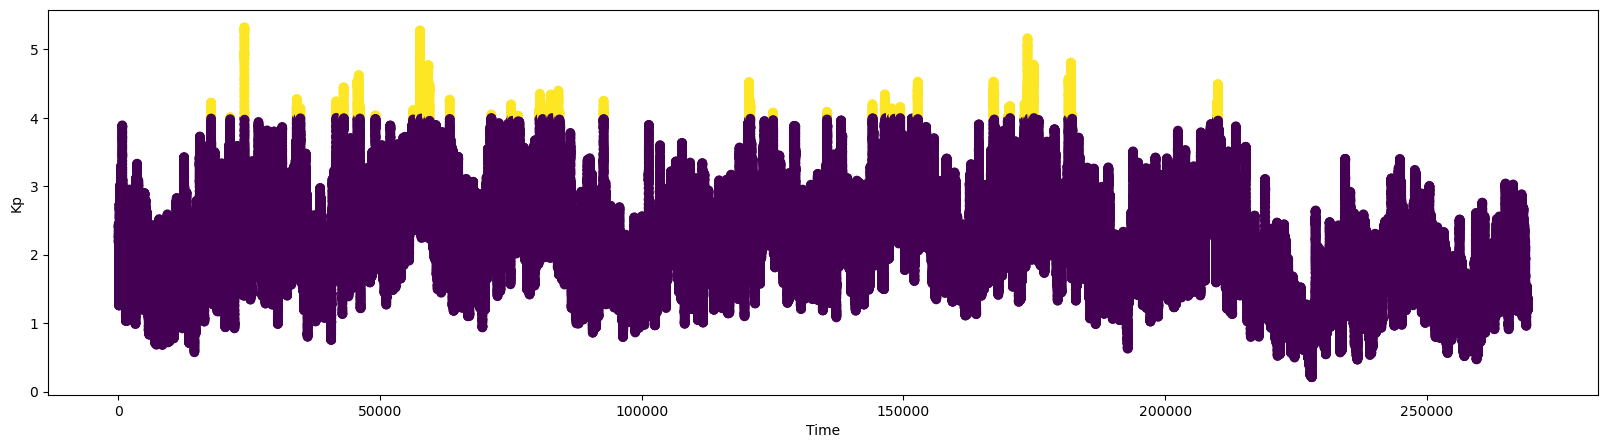

In [97]:
#Not super useful in the current form
from matplotlib import pyplot as plt 
plt.figure(figsize=(20, 5))

avgs = data['Kp'].rolling(100).mean()
# plt.plot(data.index, data['Kp'].rolling(100).mean());
# plt.scatter(data.index, data['Kp'].rolling(100).mean(), c=data['Kp']>6);
plt.scatter(avgs.index, avgs, c=avgs>4);
plt.ylabel('Kp');
plt.xlabel('Time');

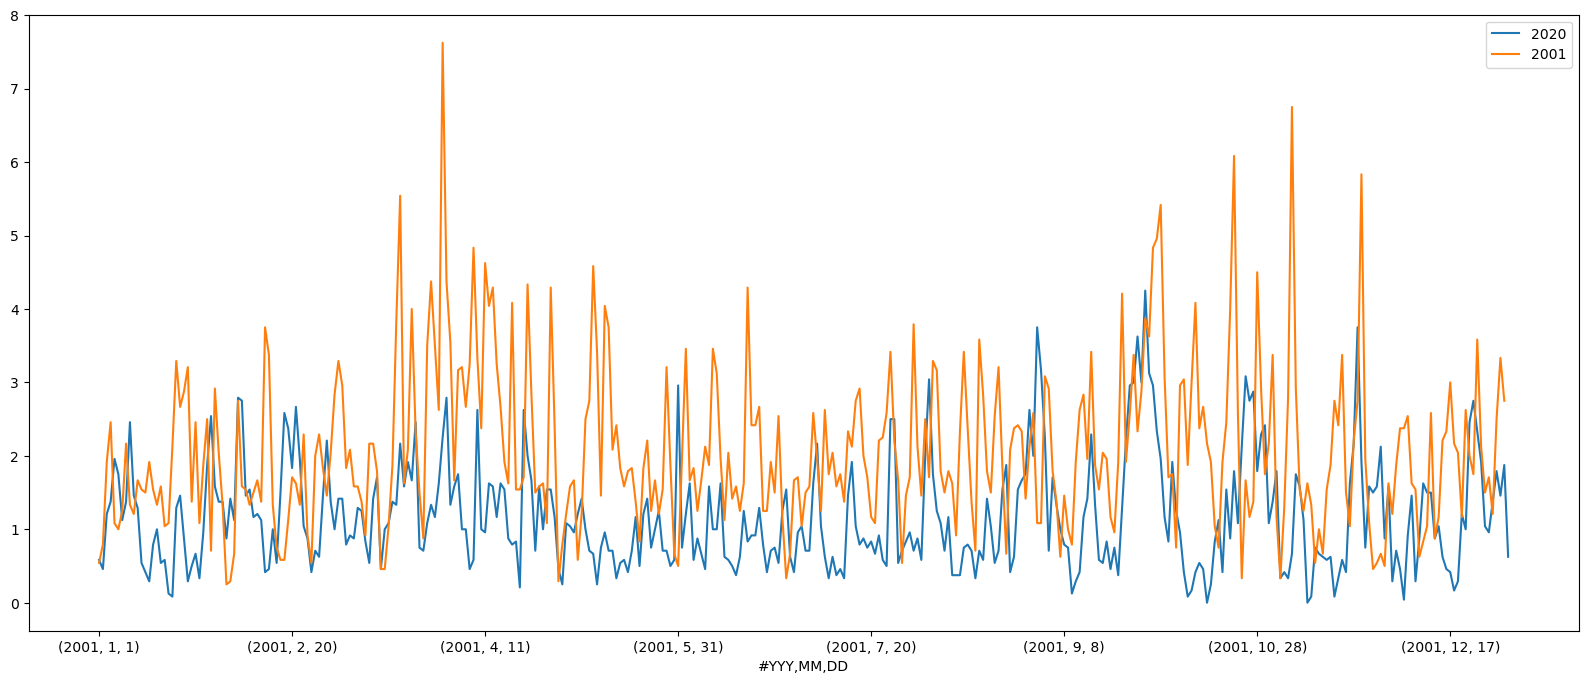

In [98]:
plt.figure(figsize=(20, 8))

year1 = 2020
daily_avgs = data[data['#YYY'] == year1].groupby(['#YYY', 'MM', 'DD']).mean()['Kp']
daily_avgs.plot(label=year1)
year2 = 2001
daily_avgs = data[data['#YYY'] == year2].groupby(['#YYY', 'MM', 'DD']).mean()['Kp']
daily_avgs.plot(label=year2)
plt.legend()

In [99]:
data['significant'] = data['Kp'] > 4.0
data[data['significant']][-50:]

#count number of rows that are significant 
len(data[data['significant']])

25785

In [100]:
data.head()

,#YYY,MM,DD,hh.h,hh._m,days,days_m,Kp,ap,D,significant
0,1932,1,1,0.0,1.5,0.000,0.0625,3.333,18,1,False
1,1932,1,1,3.0,4.5,0.125,0.1875,2.667,12,1,False
2,1932,1,1,6.0,7.5,0.250,0.3125,2.333,9,1,False
3,1932,1,1,9.0,10.5,0.375,0.4375,2.667,12,1,False
4,1932,1,1,12.0,13.5,0.500,0.5625,3.333,18,1,False


In [101]:
#from sklearn.datasets import load_iris
#from sklearn.model_selection import train_test_split
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import classification_report

## 1. Load the data
#data = load_iris(as_frame=True)
#X    = data['data']
#y    = data['target']

## 2. Create a train/test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 3. Instantiate a model
#model = KNeighborsClassifier()

## 4. Fit a model
#model.fit(X_train, y_train)

## 5. Predict on the test set
#preds = model.predict(X_test)

## 6. Print classification report
#print(classification_report(y_test, preds))

In [102]:
sndata.shape, data.shape

((75271, 7), (269240, 11))

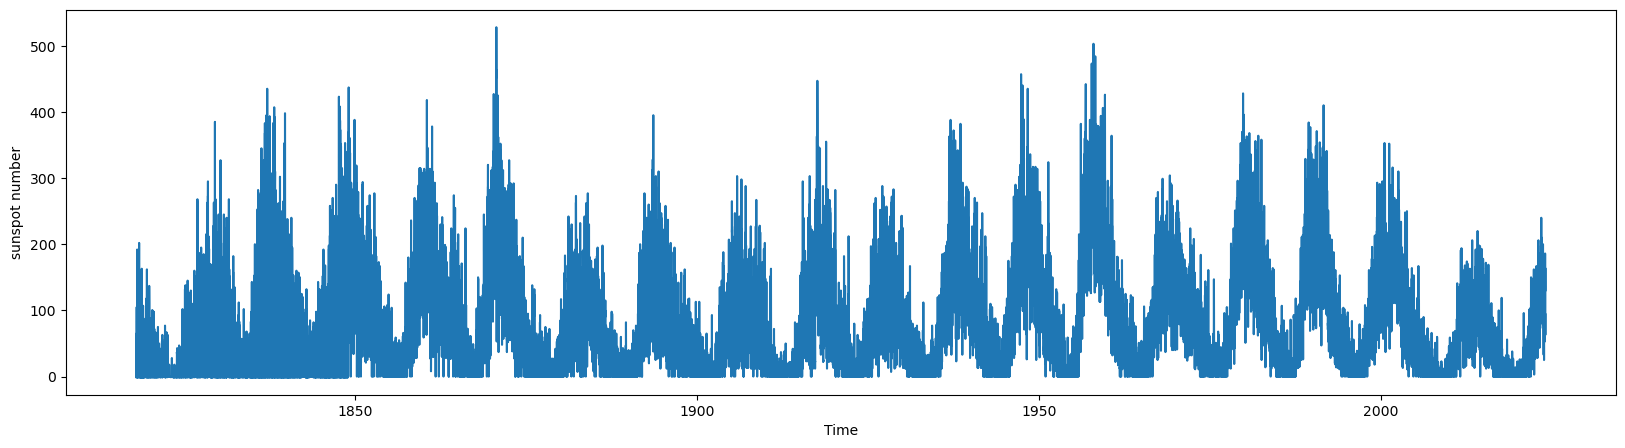

In [117]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(20, 5))

plt.plot(sndata['D,FYR'], sndata['SS#']);
plt.ylabel('sunspot number');
plt.xlabel('Time');

In [128]:
col= sndata['SS#']
train = col[:int(0.8*(len(col)))]
test = col[int(0.2*(len(col))):]

In [137]:
mod = sm.tsa.statespace.SARIMAX(train.values)#, order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                60216
Model:               SARIMAX(1, 0, 0)   Log Likelihood             -301980.651
Date:                Tue, 12 Mar 2024   AIC                         603965.302
Time:                        15:14:07   BIC                         603983.314
Sample:                             0   HQIC                        603970.896
                              - 60216                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9456      0.001    890.848      0.000       0.944       0.948
sigma2      1328.7797      2.590    513.009      0.000    1323.703    1333.856
Ljung-Box (L1) (Q):                5196.21   Jarque-

In [154]:
train

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
60211    112
60212    133
60213    142
60214    146
60215    108
Name: SS#, Length: 60216, dtype: int64

In [155]:
test.index

RangeIndex(start=15054, stop=75271, step=1)

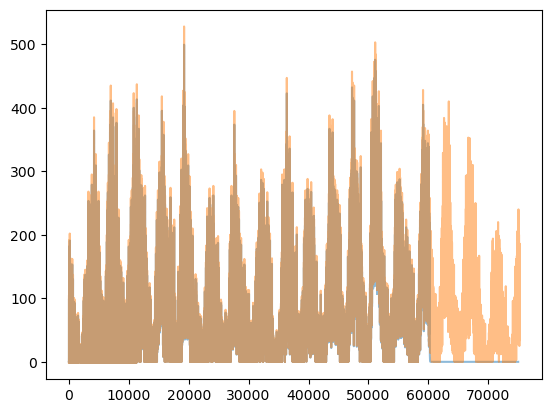

In [213]:
y = res.predict(start=0,end=75000,dynamic=False)
plt.plot(y, alpha=0.5)
#plt.plot(test)
plt.plot(sndata['SS#'], alpha=0.5)


In [157]:
#y_prime = res.predict(train.values)
sndata['forecast']=res.predict(start=66000,end=70000,dynamic=True)
# sndata[['SS#','forecast']].plot(figsize=(12,8))

ValueError: Length of values (4001) does not match length of index (75271)